# Project 2: Ames Housing Data and Kaggle Challenge


## Problem Statement

As a prominent real estate consultant in the country, the city of Ames, Iowa, asked me to help them predict the housing prices of a local builder's new development. They were interested in my expertise because I am an Adobe DSI student, and locals are anxiously worried that their mortgages would be affected by the new builds. The objective of my new study is to develop a model that best predicts the price of Red Oak Construction homes as closely as possible. I aim to predict these prices so that the city of Ames can decide whether they should increase property taxes throughout the city or lower property taxes to help their citizens.

### Contents:
- [Background](#Background)
- [Data Import & Preprocessing](#Data-Import-and-Preprocessing)
- [EDA](#Exploratory-Data-Analysis)
- [Modeling](#Modeling)
- [Visualizations](#Visualization)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)
- [Sources](#Sources)

## Background

The Ames Housing Dataset is an exceptionally detailed and robust dataset with over 70 columns of different features relating to houses. It is my job to predict the sales price for each house. For each Id in the test set, I must predict the value of the SalePrice variable ([Kaggle](https://www.kaggle.com/competitions/adobe-dsb-34/overview)).

### Datasets Used:
* [`train.csv`](./datasets/train.csv): Ames Housing Dataset Used to Train Model
* [`test.csv`](./datasets/test.csv): Ames Housing Dataset Used to Make Predictions

### Outside Research

In order to make informed decisions for the local officials of Ames, Iowa, I reasearched the impact of property taxes on new housing developments. I found that sales can be 25% to 30% more than assessed home values ([Ames Tribune](https://www.amestrib.com/story/news/2023/04/04/why-did-ames-property-tax-assessments-go-up-an-average-of-30-percent-2023-how-to-appeal/70077651007/)). And also, new construction can led to $1k tax bill increases the following year after the build is finisihed ([Motley Fool](https://www.fool.com/the-ascent/mortgages/articles/buying-new-construction-your-property-tax-bill-might-spike-in-a-year/#:~:text=They%20may%20be%20familiar%20with,climb%20rapidly%20after%20a%20year.)).

## Data Import and Preprocessing

In [1]:
#general imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#model imports
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.compose import TransformedTargetRegressor
import statsmodels.api as sm
from sklearn.feature_selection import RFE

# warning imports
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing datasets
train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')

### Cleaning Training and Testing Categorical Data

##### Note: The displayed dataframe will be my train dataset as that is the dataset I have to use before making predictions. I will do what I do to my training set to my test data in the background.

In [3]:
train.head()

,Unnamed: 0,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,532,1612,526352080,20,RL,85.0,10667,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,3,2007,WD,167300
1,415,2045,904100100,70,RL,107.0,12888,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,4,2007,WD,219000
2,273,1962,535451110,20,RL,60.0,7200,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,7,2007,WD,129000
3,1460,229,905109130,60,RL,80.0,14000,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,4,2010,WD,328000
4,250,1105,528363020,60,RL,NaN,11929,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,6,2008,WD,290000


In [4]:
#checking for specific dtypes to split the cleaning proccess 
print("train data types:", train.dtypes.unique())
print("test data types:", test.dtypes.unique())

train data types: [dtype('int64') dtype('O') dtype('float64')]
test data types: [dtype('int64') dtype('O') dtype('float64')]


In [5]:
#splitting df by column type in order to thoroughly clean it 
train_cat = train.select_dtypes('object')
test_cat = test.select_dtypes('object')

train_cat.head()

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Gd,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD
1,RL,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Sawyer,Feedr,...,Gd,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD
2,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,NaN,Detchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD
3,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,ClearCr,Norm,...,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD
4,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,...,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD


In [6]:
#checking for nulls and only displaying columns with null values; used a non-null column to track
train_cat.isna().sum().sort_values(ascending = False).head(16)

Pool QC           1531
Misc Feature      1484
Alley             1427
Fence             1225
Mas Vnr Type       931
Fireplace Qu       765
Garage Type         88
Garage Cond         88
Garage Qual         88
Garage Finish       88
Bsmt Exposure       43
BsmtFin Type 2      41
Bsmt Cond           40
BsmtFin Type 1      40
Bsmt Qual           40
Functional           0
dtype: int64

In [7]:
#dropping columns that have high number of missing values. i will not be able to impute anything of substance that could help my model
def null_col_dropper(df, threshold=0.50): #threshold help from https://stackoverflow.com/questions/58837565/pandas-remove-column-based-on-threshold-criteria
    total_nulls = df.isna().sum()
    total_rows = len(df)
    cols_to_drop = []

    for col, col_nulls in total_nulls.items():
        if col_nulls / total_rows > threshold:
            cols_to_drop.append(col)

    df.drop(cols_to_drop, axis=1, inplace=True)
    return df

#calling function
null_col_dropper(test_cat)
null_col_dropper(train_cat).head()

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,...,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD
1,RL,Pave,Reg,Bnk,AllPub,Inside,Gtl,Sawyer,Feedr,Norm,...,SBrkr,TA,Typ,Gd,Attchd,Fin,TA,TA,Y,WD
2,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,SBrkr,Gd,Typ,NaN,Detchd,RFn,TA,TA,Y,WD
3,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,ClearCr,Norm,Norm,...,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD
4,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD


In [8]:
#the data dictionary says that nulls in columns signify that feature doesnt exist for the house, 
#i will input none for categorical columns and 0 for numericals instead of dropping the retained column

train_cat.fillna('None', inplace = True)
test_cat.fillna('None', inplace = True)
train_cat.head()

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,...,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD
1,RL,Pave,Reg,Bnk,AllPub,Inside,Gtl,Sawyer,Feedr,Norm,...,SBrkr,TA,Typ,Gd,Attchd,Fin,TA,TA,Y,WD
2,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,SBrkr,Gd,Typ,None,Detchd,RFn,TA,TA,Y,WD
3,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,ClearCr,Norm,Norm,...,SBrkr,Gd,Typ,None,Attchd,RFn,TA,TA,Y,WD
4,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD


In [9]:
#checking to see if it filled all nulls 
print(f'Train categorical df null total: {train_cat.isna().sum().sum()}')
print(f'Test categorical df null total: {test_cat.isna().sum().sum()}')

Train categorical df null total: 0
Test categorical df null total: 0


### Cleaning Training & Testing Numerical Data

In [10]:
#splitting df by column type in order to thoroughly clean it 
train_num = train.select_dtypes('number')
test_num = test.select_dtypes('number')

train_num.head()

,Unnamed: 0,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,532,1612,526352080,20,85.0,10667,6,6,1971,1971,...,0,44,0,0,0,0,0,3,2007,167300
1,415,2045,904100100,70,107.0,12888,7,8,1937,1980,...,521,0,0,0,0,0,0,4,2007,219000
2,273,1962,535451110,20,60.0,7200,5,8,1950,2002,...,194,0,0,0,0,0,0,7,2007,129000
3,1460,229,905109130,60,80.0,14000,7,5,1996,1997,...,296,44,0,0,0,0,0,4,2010,328000
4,250,1105,528363020,60,NaN,11929,8,7,1995,1995,...,192,87,0,0,0,0,0,6,2008,290000


In [11]:
#checking for nulls and only displaying columns with null values; used a non-null column to track
train_num.isna().sum().sort_values(ascending = False).head(10)

Lot Frontage      253
Garage Yr Blt      88
Mas Vnr Area       18
Bsmt Half Bath      2
Bsmt Full Bath      2
Total Bsmt SF       1
Bsmt Unf SF         1
BsmtFin SF 2        1
BsmtFin SF 1        1
Enclosed Porch      0
dtype: int64

In [12]:
#using function to drop columns if theyre missing 50% of data
null_col_dropper(test_num)
null_col_dropper(train_num).head()

,Unnamed: 0,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,532,1612,526352080,20,85.0,10667,6,6,1971,1971,...,0,44,0,0,0,0,0,3,2007,167300
1,415,2045,904100100,70,107.0,12888,7,8,1937,1980,...,521,0,0,0,0,0,0,4,2007,219000
2,273,1962,535451110,20,60.0,7200,5,8,1950,2002,...,194,0,0,0,0,0,0,7,2007,129000
3,1460,229,905109130,60,80.0,14000,7,5,1996,1997,...,296,44,0,0,0,0,0,4,2010,328000
4,250,1105,528363020,60,NaN,11929,8,7,1995,1995,...,192,87,0,0,0,0,0,6,2008,290000


In [13]:
#seeing the retained null columns
train_num.isna().sum().sort_values(ascending = False).head(10)

Lot Frontage      253
Garage Yr Blt      88
Mas Vnr Area       18
Bsmt Half Bath      2
Bsmt Full Bath      2
Total Bsmt SF       1
Bsmt Unf SF         1
BsmtFin SF 2        1
BsmtFin SF 1        1
Enclosed Porch      0
dtype: int64

In [14]:
#according to the data dictionary, some numeric values have nulls bc the house doesnt have that feature; i will input 0 to coincide with the dictionary and not drop the columns
#i will also compute a median aggregator for other columns to account for outliers

#replacing nulls with mode since these are categorical variables
def num_zero_filler(dataframe):
    for col in dataframe.columns:
        dataframe['Lot Frontage'].fillna(dataframe['Lot Frontage'].median(), inplace=True)
        dataframe['Garage Yr Blt'].fillna(dataframe['Year Built'], inplace=True) #replaced with built year of house because garages are typically built the same time as the house
        dataframe['Mas Vnr Area'].fillna(0, inplace=True)
        dataframe['Bsmt Half Bath'].fillna(0, inplace=True)
        dataframe['Bsmt Full Bath'].fillna(0, inplace=True)
        dataframe['Total Bsmt SF'].fillna(0, inplace=True)
        dataframe['Bsmt Unf SF'].fillna(0, inplace=True)
        dataframe['BsmtFin SF 2'].fillna(0, inplace=True)
        dataframe['BsmtFin SF 1'].fillna(0, inplace=True)
        dataframe['Garage Cars'].fillna(0, inplace=True) #nulls from test
        dataframe['Garage Area'].fillna(0, inplace=True) #nulls from test

    return dataframe

#calling function
num_zero_filler(train_num)
num_zero_filler(test_num)
 
train_num.head()

,Unnamed: 0,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,532,1612,526352080,20,85.0,10667,6,6,1971,1971,...,0,44,0,0,0,0,0,3,2007,167300
1,415,2045,904100100,70,107.0,12888,7,8,1937,1980,...,521,0,0,0,0,0,0,4,2007,219000
2,273,1962,535451110,20,60.0,7200,5,8,1950,2002,...,194,0,0,0,0,0,0,7,2007,129000
3,1460,229,905109130,60,80.0,14000,7,5,1996,1997,...,296,44,0,0,0,0,0,4,2010,328000
4,250,1105,528363020,60,68.0,11929,8,7,1995,1995,...,192,87,0,0,0,0,0,6,2008,290000


In [15]:
#checking to see if it filled all nulls 
print(f'Train numerical df null total: {train_num.isna().sum().sum()}')
print(f'Test numerical df null total: {test_num.isna().sum().sum()}')

Train numerical df null total: 0
Test numerical df null total: 0


#### Checking to make sure all dataframes mirror

In [16]:
#for all cat dfs
def cat_col_checker(train_cat, test_cat):
    if len(train_cat.columns) == len(test_cat.columns):
        print(f"WHOOHOO! Test cat and train cat have same columns")
    else:
        print(f"OH NO! Something's wrong, train_cat has {len(train_cat.columns)} columns and test_cat has {len(test_cat.columns)}")
        
cat_col_checker(train_cat, test_cat)

WHOOHOO! Test cat and train cat have same columns


In [17]:
#for all cat dfs
def num_col_checker(train_num, test_num):
    if len(train_num.columns) == len(test_cat.columns):
        print(f"WHOOHOO! Test cat and train cat have same columns")
    else:
        print(f"OH NO! Something's wrong, train_num has {len(train_num.columns)} columns and test_num has {len(test_num.columns)}")
        
num_col_checker(train_num, test_num)

OH NO! Something's wrong, train_num has 40 columns and test_num has 39


##### Note: The lapse in `test_num` total columns is accounted for. This is because as of yet, it does not have the `SalePrice` column that `train_num` has, which it will when predictions are made.

### Adding portioned dataframes back to their orignal dataframe

In [18]:
#for train
train_num.reset_index(drop=True, inplace=True)
train_cat.reset_index(drop=True, inplace=True)
train = pd.concat([train_num, train_cat], axis=1)

#for test
test_num.reset_index(drop=True, inplace=True)
test_cat.reset_index(drop=True, inplace=True)
test = pd.concat([test_num, test_cat], axis=1)

#displaying to make sure it went smoothly
train.head()

,Unnamed: 0,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,...,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type
0,532,1612,526352080,20,85.0,10667,6,6,1971,1971,...,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD
1,415,2045,904100100,70,107.0,12888,7,8,1937,1980,...,SBrkr,TA,Typ,Gd,Attchd,Fin,TA,TA,Y,WD
2,273,1962,535451110,20,60.0,7200,5,8,1950,2002,...,SBrkr,Gd,Typ,None,Detchd,RFn,TA,TA,Y,WD
3,1460,229,905109130,60,80.0,14000,7,5,1996,1997,...,SBrkr,Gd,Typ,None,Attchd,RFn,TA,TA,Y,WD
4,250,1105,528363020,60,68.0,11929,8,7,1995,1995,...,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD


In [19]:
#checking to see if everything worked smoothly
print("Train nulls", train.isna().sum().sum())
print("Test nulls", test.isna().sum().sum())

Train nulls 0
Test nulls 0


### Engineering Features to Reduce Redundancy

In [20]:
#adding all baths
def bath_totaler(df):
    totbath = (df['Bsmt Full Bath'] + df['Full Bath']) + ((df['Bsmt Half Bath'] + df['Half Bath'])*0.5)
    df.insert(1,'Total Bath', totbath)
    df.drop(columns = ['Full Bath', 'Bsmt Full Bath', 'Half Bath', 'Bsmt Half Bath'], inplace = True)
    return df
    
bath_totaler(train)
bath_totaler(test)

train.head()

,Unnamed: 0,Total Bath,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,...,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type
0,532,2.0,1612,526352080,20,85.0,10667,6,6,1971,...,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD
1,415,2.5,2045,904100100,70,107.0,12888,7,8,1937,...,SBrkr,TA,Typ,Gd,Attchd,Fin,TA,TA,Y,WD
2,273,2.0,1962,535451110,20,60.0,7200,5,8,1950,...,SBrkr,Gd,Typ,None,Detchd,RFn,TA,TA,Y,WD
3,1460,3.5,229,905109130,60,80.0,14000,7,5,1996,...,SBrkr,Gd,Typ,None,Attchd,RFn,TA,TA,Y,WD
4,250,2.5,1105,528363020,60,68.0,11929,8,7,1995,...,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD


In [21]:
#adding house square footage
def sq_totaler(df):
    totsq = df['Total Bsmt SF'] + df['1st Flr SF'] + df['2nd Flr SF']
    df.insert(1,'Total Sq', totsq)
    df.drop(columns = ['Total Bsmt SF', '1st Flr SF','2nd Flr SF' ], inplace = True)
    return df
    
sq_totaler(train)
sq_totaler(test)

train.head()

,Unnamed: 0,Total Sq,Total Bath,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,...,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type
0,532,3174.0,2.0,1612,526352080,20,85.0,10667,6,6,...,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD
1,415,3272.0,2.5,2045,904100100,70,107.0,12888,7,8,...,SBrkr,TA,Typ,Gd,Attchd,Fin,TA,TA,Y,WD
2,273,1728.0,2.0,1962,535451110,20,60.0,7200,5,8,...,SBrkr,Gd,Typ,None,Detchd,RFn,TA,TA,Y,WD
3,1460,3566.0,3.5,229,905109130,60,80.0,14000,7,5,...,SBrkr,Gd,Typ,None,Attchd,RFn,TA,TA,Y,WD
4,250,3743.0,2.5,1105,528363020,60,68.0,11929,8,7,...,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD


In [22]:
#adding if house has porch or not
def porch_totaler(df):
    porch_columns = ['Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch']
    porch = df[porch_columns].sum(axis=1) > 0
    df.insert(1, 'Has_Porch', porch.map({True: 1, False: 0}))
    df.drop(columns = porch_columns, inplace = True)
    return df

porch_totaler(train)
porch_totaler(test)

train.head()

,Unnamed: 0,Has_Porch,Total Sq,Total Bath,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,...,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type
0,532,1,3174.0,2.0,1612,526352080,20,85.0,10667,6,...,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD
1,415,0,3272.0,2.5,2045,904100100,70,107.0,12888,7,...,SBrkr,TA,Typ,Gd,Attchd,Fin,TA,TA,Y,WD
2,273,0,1728.0,2.0,1962,535451110,20,60.0,7200,5,...,SBrkr,Gd,Typ,None,Detchd,RFn,TA,TA,Y,WD
3,1460,1,3566.0,3.5,229,905109130,60,80.0,14000,7,...,SBrkr,Gd,Typ,None,Attchd,RFn,TA,TA,Y,WD
4,250,1,3743.0,2.5,1105,528363020,60,68.0,11929,8,...,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD


### Splitting Data and Selecting Features

In [23]:
#getting categorical dummies
def categorical_encoder(df):
    categorical_cols = df.select_dtypes(include='object').columns.tolist()
    ohe = OneHotEncoder(sparse_output=False, drop='first')
    cat_encoded = ohe.fit_transform(df[categorical_cols])
    cat_encoded_df = pd.DataFrame(cat_encoded, columns=ohe.get_feature_names_out())
    df.drop(columns=categorical_cols, inplace=True) #dropping categorical cols so df values are all be numeric
    df = pd.concat([df, cat_encoded_df], axis=1) #assigning dummiess back to df
    
    return df

#calling function
categorical_encoder(test)
categorical_encoder(train).head()


,Unnamed: 0,Has_Porch,Total Sq,Total Bath,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,...,Paved Drive_P,Paved Drive_Y,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,532,1,3174.0,2.0,1612,526352080,20,85.0,10667,6,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,415,0,3272.0,2.5,2045,904100100,70,107.0,12888,7,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,273,0,1728.0,2.0,1962,535451110,20,60.0,7200,5,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1460,1,3566.0,3.5,229,905109130,60,80.0,14000,7,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,250,1,3743.0,2.5,1105,528363020,60,68.0,11929,8,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [24]:
#checking to see if df now has all numeric values
print(train.dtypes.unique())
print(test.dtypes.unique())

[dtype('int64') dtype('float64')]
[dtype('int64') dtype('float64')]


In [25]:
#identifying features and target
X = train.drop('SalePrice', axis = 1)
y = train['SalePrice']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#selecting features
estimator = Ridge()
rfe = RFE(estimator, n_features_to_select=10)
rfe.fit(X_train, y_train)

#updating training and testing data to include only selected features
X_train_selected = rfe.transform(X_train)
X_val_selected = rfe.transform(X_val)

#getting feature names for eda process
selected_feature_indices = rfe.support_
selected_feature_names = X.columns[selected_feature_indices]
selected_features = selected_feature_names.tolist()
selected_features

['Total Bath',
 'Overall Qual',
 'Overall Cond',
 'Year Remod/Add',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Cars',
 'Mo Sold']

## Exploratory Data Analysis

In [26]:
train.describe()

,Unnamed: 0,Has_Porch,Total Sq,Total Bath,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,...,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1.538000e+03,1538.000000,1538.000000,1538.000000,1538.000000,...,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000
mean,1024.970741,0.696359,2548.931079,2.218140,1469.562419,7.118700e+08,56.983095,69.151495,9955.676203,6.109883,...,0.578674,1976.632640,1.769831,472.576723,94.012354,2.569571,58.338101,6.177503,2007.776983,181061.993498
std,588.860047,0.459979,823.177403,0.813262,840.814349,1.886513e+08,43.217246,22.029224,5427.477335,1.428502,...,0.636649,27.413689,0.764587,218.266217,124.893497,38.947031,623.083653,2.698290,1.305238,79552.718835
min,0.000000,0.000000,334.000000,1.000000,1.000000,5.263011e+08,20.000000,21.000000,1476.000000,1.000000,...,0.000000,1872.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,13100.000000
25%,522.250000,0.000000,1996.750000,1.500000,748.250000,5.284562e+08,20.000000,60.000000,7473.000000,5.000000,...,0.000000,1958.000000,1.000000,316.250000,0.000000,0.000000,0.000000,4.000000,2007.000000,129925.000000
50%,1022.000000,1.000000,2446.000000,2.000000,1483.500000,5.354511e+08,50.000000,68.000000,9487.500000,6.000000,...,1.000000,1978.000000,2.000000,478.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162250.000000
75%,1528.750000,1.000000,2986.750000,3.000000,2189.750000,9.071308e+08,70.000000,78.000000,11498.000000,7.000000,...,1.000000,2001.000000,2.000000,576.000000,168.000000,0.000000,0.000000,8.000000,2009.000000,213000.000000
max,2050.000000,1.000000,11752.000000,7.000000,2930.000000,9.241510e+08,190.000000,313.000000,63887.000000,10.000000,...,4.000000,2207.000000,4.000000,1418.000000,870.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


### Does the target follow LINE assumptions?

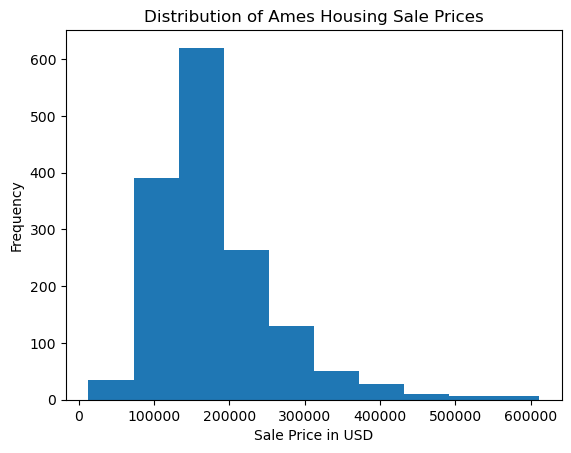

In [27]:
plt.hist(train['SalePrice'])
plt.title("Distribution of Ames Housing Sale Prices")
plt.xlabel("Sale Price in USD")
plt.ylabel("Frequency");

The target is right-skewed which indicates outliers. Majority of sale prices are lower than the mean, however; there are higher home prices skewing the target. Because of this, I will apply a logarithmic transformation to normalize the target when I model my dataset.

### How do the selected features correlate with the target?

In [28]:
#adding selected features to a df with target
selected_features_df = train[selected_features]
selected_features_df['SalePrice'] = train['SalePrice']
selected_features_df
#making a correlation matrix for numeric columns to check how each feature would corrrelate to the target
corr_matrix = selected_features_df.corr()[['SalePrice']].sort_values(by = 'SalePrice', ascending = False)
corr_matrix.head(10)

,SalePrice
SalePrice,1.000000
Overall Qual,0.795815
Garage Cars,0.649464
Total Bath,0.637247
Year Remod/Add,0.546412
TotRms AbvGrd,0.523055
Fireplaces,0.478415
Bedroom AbvGr,0.137310
Mo Sold,0.043508
Overall Cond,-0.093388


The top 10 numerical features that are most correlative with the target are:
1. Overall Qual
2. Garage Cars
3. Total Bath
4. Year Remod/Add
5. TotRms AbvGrd
6. Fireplaces
7. Bedroom AbvGr
8. Mo Sold
9. Overall Cond

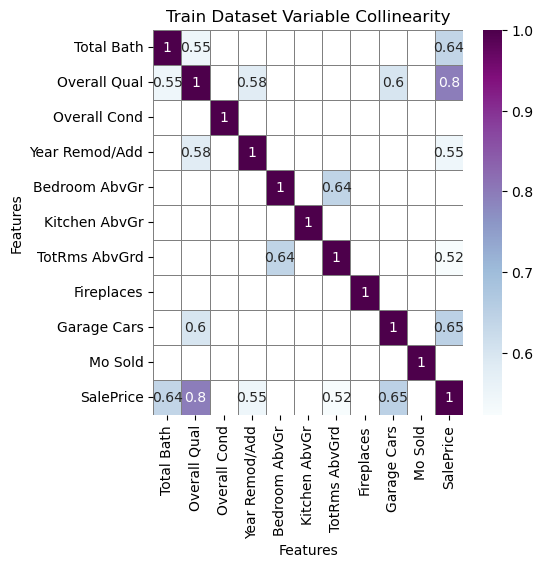

In [29]:
#looking at relationship between features to decide on which to use and reduce multicollinearity
feats_corr = selected_features_df.corr()
high_feats_corr  = feats_corr >= 0.5
plt.figure(figsize=(5, 5))
sns.heatmap(feats_corr, mask =~high_feats_corr, annot=True, cmap='BuPu',linewidths= 0.5, linecolor= 'gray')
plt.title("Train Dataset Variable Collinearity")
plt.xlabel("Features")
plt.ylabel("Features");

Overall Quality is the most correlative feature with SalePrice. Outside of that relationship, there does not appear to be any concerning high multicolinear features selected for my model.

### What is the distribution of the selected features in relation to the target?

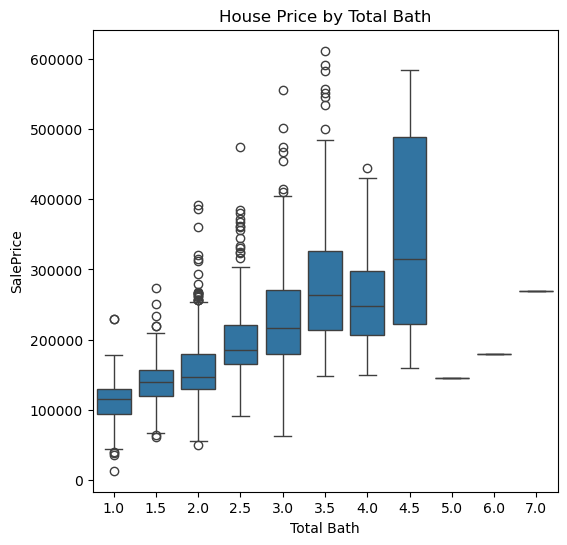

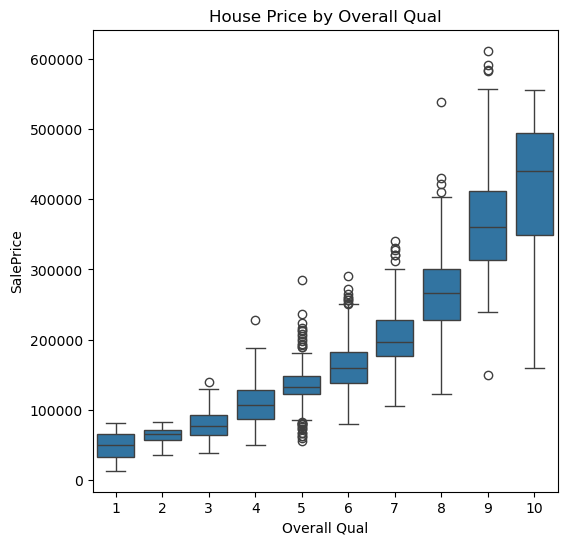

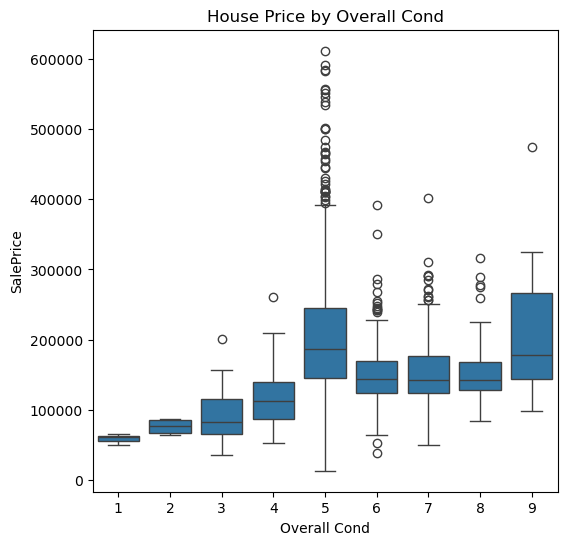

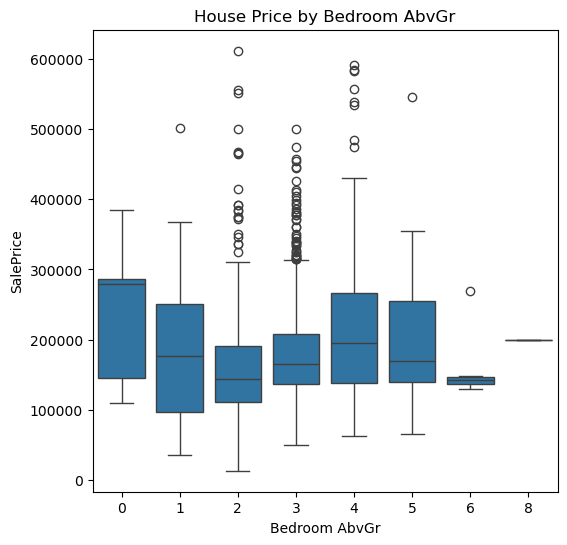

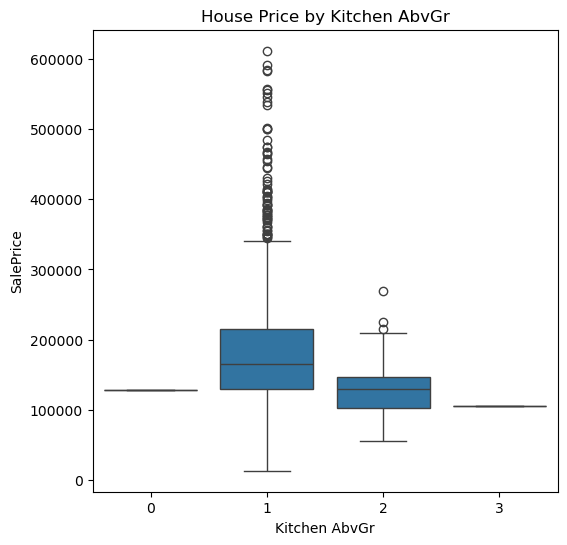

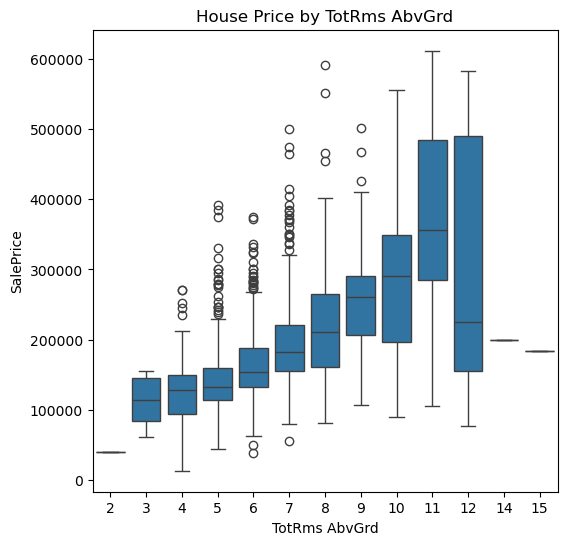

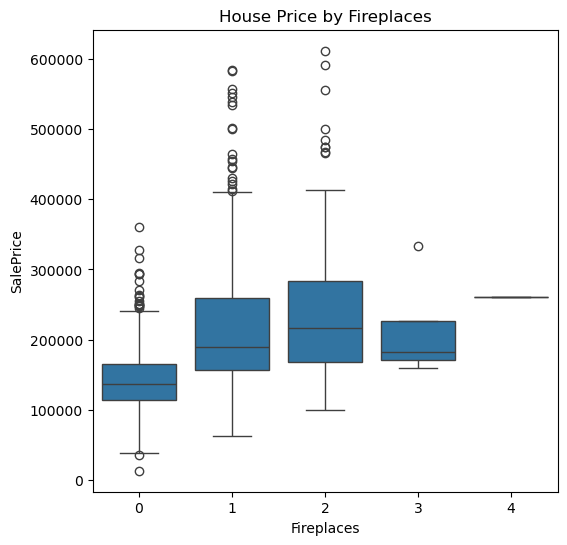

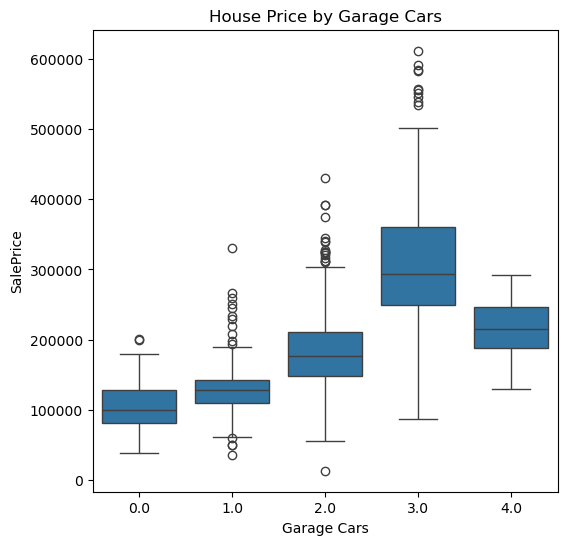

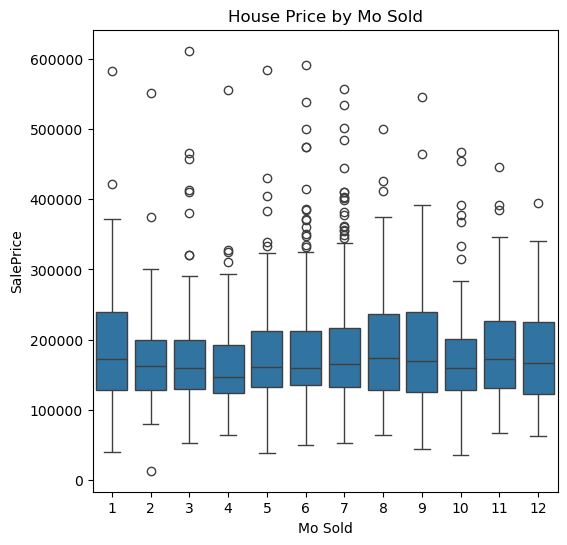

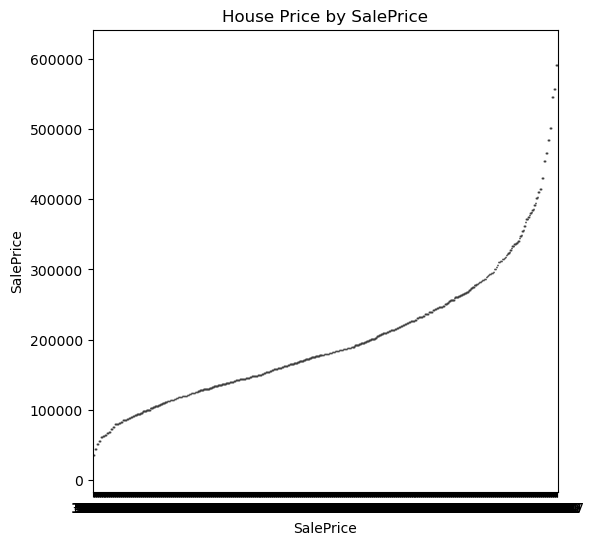

In [30]:
#creating function to show plot
def distribution_displayer(df):
    for col in df.columns:
        plt.figure(figsize=(6, 6))
        sns.boxplot(data=df, x=col, y='SalePrice')
        plt.title(f'House Price by {col}')
#calling function to display all columns except Year Remod/Add bc it has too many values and need to be seperate plot
distribution_displayer(selected_features_df.drop('Year Remod/Add', axis = 1))

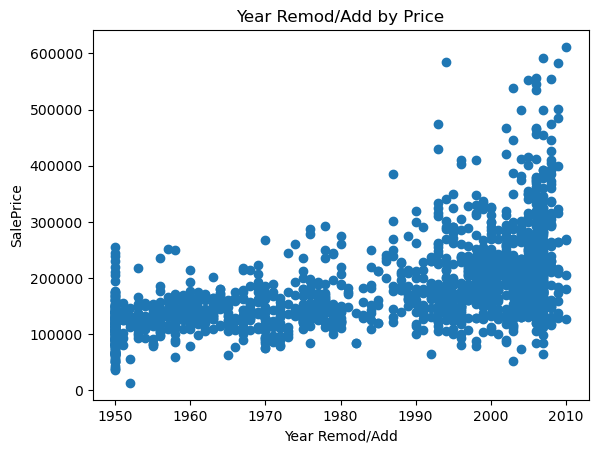

In [31]:
#for Year Remod/Add
plt.scatter(data = selected_features_df,x= 'Year Remod/Add', y='SalePrice')
plt.xlabel('Year Remod/Add')
plt.ylabel('SalePrice')
plt.title('Year Remod/Add by Price');

Of the selected features, there does seem to be skewed distributions and outliers. For example, a house having an overall condition rate of 5(which according to the Ames data dictionary means the house is in Average condition), include houses that were sold above the median value for average condition houses. Also, houses were shown to have an increase in sale price as the year remodeled increased. I will further account for outliers by scaling features during my modelling process. Using `StandardScaler` will allow my model to be less sensitive to outliers.

## Modelling

### Linear Regression

In [32]:
#instantiating and fitting model
lr_model = TransformedTargetRegressor(LinearRegression(),func=np.log,inverse_func=np.exp) #using TTR for normalization

lr_pipe = Pipeline([('scale', StandardScaler()),
                    ('model', lr_model)]).fit(X_train_selected, y_train).fit(X_train_selected, y_train)

#### Predictions

In [33]:
#on training set
lr_train_preds = lr_pipe.predict(X_train_selected)
#on validation set
lr_val_preds = lr_pipe.predict(X_val_selected)

### Ridge Regression

In [34]:
#instantiating and fitting model
ridge_model = TransformedTargetRegressor(Ridge(),func=np.log,inverse_func=np.exp)

ridge_pipe = Pipeline([('scale', StandardScaler()),
                    ('model', ridge_model)]).fit(X_train_selected, y_train).fit(X_train_selected, y_train)

#### Predictions

In [35]:
#on training set
r_train_preds = ridge_pipe.predict(X_train_selected)
#on validation set
r_val_preds = ridge_pipe.predict(X_val_selected)

### Lasso Regression

In [36]:
#instantiating and fitting model
lasso_model = TransformedTargetRegressor(Lasso(),func=np.log,inverse_func=np.exp)

lasso_pipe = Pipeline([('scale', StandardScaler()),
                    ('model', lasso_model)]).fit(X_train_selected, y_train).fit(X_train_selected, y_train)

#### Predictions

In [37]:
#on training set
l_train_preds = lasso_pipe.predict(X_train_selected)
#on validation set
l_val_preds = lasso_pipe.predict(X_val_selected)

### Evaluations

In [38]:
#r squared for all models
def rsquared_evaluator(models, X_train_selected, y_train, X_val_selected, y_val):
    for model_name, model in models.items():
        train_rsq = model.score(X_train_selected, y_train)
        val_rsq = model.score(X_val_selected, y_val)
        
        print(f"Training {model_name} R^2:", train_rsq)
        print(f"Validation {model_name} R^2:", val_rsq)
        print(" ")

models = {"Linear Regression": lr_pipe, "Ridge Regression": ridge_pipe, "Lasso Regression": lasso_pipe}

rsquared_evaluator(models, X_train_selected, y_train, X_val_selected, y_val)

Training Linear Regression R^2: 0.799508374998469
Validation Linear Regression R^2: 0.8314399283777217
 
Training Ridge Regression R^2: 0.799474705372892
Validation Ridge Regression R^2: 0.8313357793319002
 
Training Lasso Regression R^2: -0.033963961594863035
Validation Lasso Regression R^2: -0.03588757569381307
 


In [39]:
#root mean squared error for all models

#linear
lr_train_rmse = mean_squared_error(y_train, lr_train_preds, squared=False)
lr_val_rmse = mean_squared_error(y_val, lr_val_preds, squared=False)
#ridge
r_train_rmse = mean_squared_error(y_train, r_train_preds, squared=False)
r_val_rmse = mean_squared_error(y_val, r_val_preds, squared=False)
#lasso
l_train_rmse = mean_squared_error(y_train, l_train_preds, squared=False)
l_val_rmse = mean_squared_error(y_val, l_val_preds, squared=False)
#for baseline
np.ones(len(y_val))
baseline_preds = np.ones(len(y_val))*y_train.mean()
baseline_rmse = mean_squared_error(y_val, baseline_preds, squared = False)

# Print RMSE for each model
print("Linear Regression - Training RMSE:", lr_train_rmse)
print("Linear Regression - Validation RMSE:", lr_val_rmse)
print()
print("Ridge Regression - Training RMSE:", r_train_rmse)
print("Ridge Regression - Validation RMSE:", r_val_rmse)
print()
print("Lasso Regression - Training RMSE:", l_train_rmse)
print("Lasso Regression - Validation RMSE:", l_val_rmse)
print()
print("Baseline:", baseline_rmse)

Linear Regression - Training RMSE: 35746.87323989946
Linear Regression - Validation RMSE: 32141.413672017417

Ridge Regression - Training RMSE: 35749.87469522387
Ridge Regression - Validation RMSE: 32151.34182584723

Lasso Regression - Training RMSE: 81178.80300685705
Lasso Regression - Validation RMSE: 79679.0106444306

Baseline: 78286.72252020123


Either Linear Regression or Ridge Regression could be considered as the better model. They both can predict variabilty around the target using the features in the model, and their magnitude of error showcases they perform better than the baseline. I will try to refine the model for ridge to see if I can better the performance.

### Refining with Hyperparameters

In [40]:
params = {'model__regressor__alpha': np.logspace(0, 3, num=100)}

ridge_grid_search = GridSearchCV(estimator=ridge_pipe, param_grid=params, cv=5).fit(X_train_selected, y_train)
ridge_best_hyperparameters = ridge_grid_search.best_params_
ridge_pipe.set_params(**ridge_best_hyperparameters)
best_ridge = ridge_pipe.fit(X_train_selected, y_train)


### Re-Evaluations

In [41]:
#r squared
train_rsq = best_ridge.score(X_train_selected, y_train)
val_rsq = best_ridge.score(X_val_selected, y_val)
        
print(f"Training Best Ridge R^2:", train_rsq)
print(f"Validation Best Ridge R^2:", val_rsq)

Training Best Ridge R^2: 0.7988370357314603
Validation Best Ridge R^2: 0.8294791984688081


In [42]:
#rmse
best_ridge_train_preds = best_ridge.predict(X_train_selected)
best_ridge_val_preds = best_ridge.predict(X_val_selected)

br_train_rmse = mean_squared_error(y_train, best_ridge_train_preds, squared=False)
br_val_rmse = mean_squared_error(y_val, best_ridge_val_preds, squared=False)

print(f"Training Best Ridge RMSE:", br_train_rmse)
print(f"Validation Best Ridge RMSE:", br_val_rmse)

Training Best Ridge RMSE: 35806.671807271916
Validation Best Ridge RMSE: 32327.811378962015


It seems that Ridge did not perform as effectively with the introduction of hyperparameters. I have decided to select `lr_pipe` (my Linear Regression model without any penalty) as the preferred model for making predictions.

## Test Dataset Predictions

In [43]:
test_preds = lr_pipe.predict(test[selected_features])
test['SalePrice'] = test_preds
test[['Unnamed: 0', 'SalePrice']].set_index('Unnamed: 0').head()

,SalePrice
Unnamed: 0,
1124,122109.559855
188,226162.827568
1727,301637.378572
1658,132479.963076
1424,199850.506944


These are the housing prices my model predicts for the test data. For example, using the selected features, my model predicts the house Id of 1124 to be $122109.55

### Saving Model to CSV

In [51]:
submission = test[['Unnamed: 0', 'SalePrice']].set_index('Unnamed: 0').head()

In [52]:
submission.to_csv("./datasets/jadi_final_submission.csv")

## Visualization

In [44]:
#predictions with slected model
y_val_preds = lr_pipe.predict(X_val_selected)
y_train_preds = lr_pipe.predict(X_train_selected)

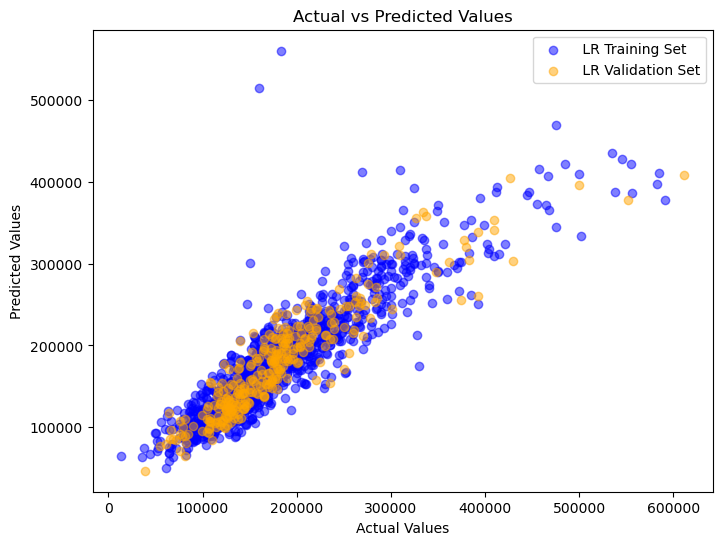

In [45]:
#showing results of selected model

#for train
plt.figure(figsize=(8, 6))  # Set the figure size
plt.scatter(y_train, y_train_preds, color='blue', label=' LR Training Set',  alpha=0.5)  # Plot actual vs predicted for training set

# Plotting actual vs predicted values for the test set
plt.scatter(y_val, y_val_preds, color='orange', label=' LR Validation Set',  alpha=0.5)  # Plot actual vs predicted for test set

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend();

## Conclusions and Recommendations

The best model I discovered to predict Ames housing was a linear regression model without penalty. It had the highest R^2 score of 0.8314 on unseen data. This means that for the features I selected in my model, the model was able to explain 83.14% of variation in sale prices. My model had an RMSE of 32141.41, meaning the magnitude of error present made the predictions off by $32141.41. 

The model I selected performed better than the baseline, which had an RMSE of 78286.72. Among the selected features used in my model, the overall quality of the house had the highest correlation with the sale price. The higher the quality of the house, the higher the predicted sale price. Additionally, in relation to house quality, if the house's condition is average, it is expected to be priced more expensively than other houses. Because of this, I would recommend that Ames, Iowa officials reject tax increases. According to the Ames Tribune, house sale prices can be 25% to 30% higher than the assessed value. Furthermore, new construction can lead to a $1,000 tax bill increase the following year (The Motley Fool).

## Sources

1. [Ames Housing Dataset](https://jse.amstat.org/v19n3/decock/DataDocumentation.txt)
2. [“Buying New Construction? Your Property Tax Bill Might Spike in a Year” by Maurice Blackman, 2023, The Motley Fool](https://www.fool.com/the-ascent/mortgages/articles/buying-new-construction-your-property-tax-bill-might-spike-in-a-year/#:~:text=They%20may%20be%20familiar%20with,climb%20rapidly%20after%20a%20year.)
3. [“Ames homeowners see a nearly 30% average hike on property tax assessments” by Kim Norvell, 2023, The Ames Tribune](https://www.amestrib.com/story/news/2023/04/04/why-did-ames-property-tax-assessments-go-up-an-average-of-30-percent-2023-how-to-appeal/70077651007/)

